In [2]:
import math
import pandas as pd
import matplotlib.pyplot as plt

# Sample dataset coming from Kaggle: https://www.kaggle.com/nageshsingh/dna-sequence-dataset

df = pd.read_csv('human.txt', sep = "\t", names = ['sequence','class'], skiprows=1)

# No info regarding the class it 
df

,sequence,class
0,ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCA...,4
1,ATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG...,4
2,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
3,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
4,ATGCAACAGCATTTTGAATTTGAATACCAGACCAAAGTGGATGGTG...,3
...,...,...
4375,ATGGAAGATTTGGAGGAAACATTATTTGAAGAATTTGAAAACTATT...,0
4376,ATGCAGTCCTTTCGGGAGCAAAGCAGTTACCACGGAAACCAGCAAA...,6
4377,ATGCAGTCCTTTCGGGAGCAAAGCAGTTACCACGGAAACCAGCAAA...,6
4378,ATGGGGCACCTGGTTTGCTGTCTGTGTGGCAAGTGGGCCAGTTACC...,6


In [3]:
# Original Source : https://github.com/Naereen/Lempel-Ziv_Complexity/blob/master/src/lempel_ziv_complexity.py

def lempel_ziv_complexity(binary_sequence):
    r""" Manual implementation of the Lempel-Ziv complexity.
    It is defined as the number of different substrings encountered as the stream is viewed from begining to the end.
    As an example:
    >>> s = '1001111011000010'
    >>> lempel_ziv_complexity(s)  # 1 / 0 / 01 / 11 / 10 / 110 / 00 / 010
    8
 
    """
    sub_strings = set()
    n = len(binary_sequence)

    ind = 0
    inc = 1
    while True:
        if ind + inc > len(binary_sequence):
            break
        sub_str = binary_sequence[ind : ind + inc]
        if sub_str in sub_strings:
            inc += 1
        else:
            sub_strings.add(sub_str)
            ind += inc
            inc = 1
    return len(sub_strings)


In [4]:
def string_to_binary(string_sequence):
    """Simple converter from a string sequence to a binary sequence"""
    return ''.join(format(ord(x), 'b') for x in string_sequence)

In [5]:
def generate_window(sequence, window_size=250, jump_size=50):
    """ Generator of windowed sequence with specific jump size
    Parameters:
    sequence (str): a string representing the data
    window_size (int): the size of the window we want to return
    jump_size (int): how much we want to move the window after each yield
    
    Yield:
    windowed sequence of specific size
    
    """
    start = 0
    end = window_size
    
    while end < len(sequence):
        yield sequence[start:end]
        
        start = start + jump_size
        end = end + jump_size

In [6]:
def generate_lz_sequence(sequence):
    """helper function to generate a list of Lempel-Ziv complexity metric"""
    lz_sequence = []
    for window in generate_window(sequence):
        encoded_sequence = string_to_binary(window)
        lz = lempel_ziv_complexity(encoded_sequence)
        lz_sequence.append(lz)
    
    return lz_sequence


In [7]:
def normalize_lz_sequence(lz_sequence, window_size=250):
    """helper function to normalize a sequence of Lempel-Ziv complexity metric"""
    return [lz/window_size for lz in lz_sequence]

In [8]:
sequence_list = df.loc[:, 'sequence'].tolist()
# simulating a big chromosome using the dna sequence 
mega_dna_sequence = ''.join(sequence_list)
len(mega_dna_sequence)

5534562

In [9]:
# Generating the lempel-ziv sequence with window of 250 nucleotide and jumps of 50 nucleotid
lz_sequence = generate_lz_sequence(mega_dna_sequence)
len(lz_sequence)

110687

In [10]:
# Normalizing the LZ complexity between 0 and 1
n_lz_sequence = normalize_lz_sequence(lz_sequence, 250)

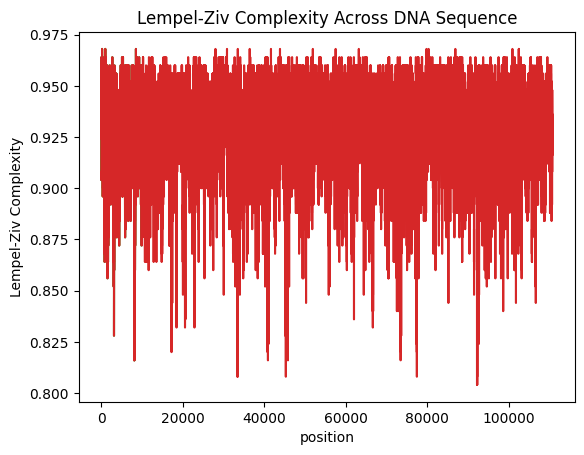

In [11]:
# Generating multiple Graphs at different resolution starting from the start of the DNA sequence for Lz Complexity
resolutions = [100, 1000, 10000]

for res in resolutions:
    plt.plot(n_lz_sequence[0:res])
    plt.xlabel("position")
    plt.ylabel("Lempel-Ziv Complexity")
    plt.title("Lempel-Ziv Complexity Across DNA Sequence")
    plt.savefig('lz_complexity_dna_{res}.png', dpi = 600)
    
plt.plot(n_lz_sequence)
plt.xlabel("position")
plt.ylabel("Lempel-Ziv Complexity")
plt.title("Lempel-Ziv Complexity Across DNA Sequence")
plt.savefig('lz_complexity_dna_full.png', dpi = 600)